Install the prometheus packages

In [1]:
pip install prometheus-api-client 


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Import libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from torch.utils.data import Dataset, DataLoader

import torch
import torch.nn as nn

from prometheus_api_client import PrometheusConnect, MetricsList, MetricSnapshotDataFrame
from prometheus_api_client.utils import parse_datetime

from datetime import datetime, timedelta



Create a data connection to prometheus instance

In [41]:
# prometheus from which metrics are to be fetched
PROM_URL = "https://thanos-querier-openshift-monitoring.apps.rosa-mntpd.813b.p1.openshiftapps.com"
PROM_ACCESS_TOKEN = "eyJhbGciOiJSUzI1NiIsImtpZCI6InJFTU9xQnNpdHBhY2hOQkRVV1hnWExGcll6TzNjbF9ZX0VTQ0ZNMFFwcTQifQ.eyJhdWQiOlsiaHR0cHM6Ly9vaWRjLm9wMS5vcGVuc2hpZnRhcHBzLmNvbS8yOXFudGx1dnViOTM1Zjk3NnYxYmRqMTdzYmthYW1kMCJdLCJleHAiOjE3NDE5ODMyNTUsImlhdCI6MTcxMDQ0NzI1NSwiaXNzIjoiaHR0cHM6Ly9vaWRjLm9wMS5vcGVuc2hpZnRhcHBzLmNvbS8yOXFudGx1dnViOTM1Zjk3NnYxYmRqMTdzYmthYW1kMCIsImt1YmVybmV0ZXMuaW8iOnsibmFtZXNwYWNlIjoibWV0cmljcy1ibG9nIiwic2VydmljZWFjY291bnQiOnsibmFtZSI6ImV4dGVybmFsLW1ldHJpY3MiLCJ1aWQiOiI4NDBiNjQ1OS1hNWI1LTRjM2ItOGMwNC1lZjgyOWUwMzVkMTgifX0sIm5iZiI6MTcxMDQ0NzI1NSwic3ViIjoic3lzdGVtOnNlcnZpY2VhY2NvdW50Om1ldHJpY3MtYmxvZzpleHRlcm5hbC1tZXRyaWNzIn0.QmfxefXLlv4LlIj1OQNT50isyqcVponxq6CorGAYJicBBRJvu9wV4wDG4YfNiSbWLdBAJF5I3gpOw3qwddLGR-K1Ulza7r0e4u57AHUiR9r3DAgI3uD8jHTMWgsCqqbm4-0ZuQfNW7R6kbSN3bWQAY5UfmfJvr17XXwd5PL1eyN4h0Fy_Cc9ifloic8sNbLZ9N4BW2mrwg7O27nG3cZTDovtIAvm8IauH_HEdFSoLqMWCzyU3UL2Pe_WVxi09m3UaeNX2dkdrULQv4RopNx3xmNjbUypJ5ymCTx7AfJ-PJngwE5EkfoeXoJbw-S6XSYZI2ynmHI7GQNkTyJGYboGlAmuSTZCUetUhXIde_fMXv8OLC_jLWVL6hgdbfauyNaHHoBNJurq1EEZhh2dhwjrnV1Mj4699QHwShB3v3p8zRYsxUo2kvHkCsgrYRH4MDwuL-gOPD4lh8ASCcVprW61p4gs3YiZD_c2jxgJaTqJ0PGIE2BP7Jm9m-KeWA2MYGw1RPQ3r2yx8w4CKLwlLEFEsBvtgaXXS7uqaD7o1AIotv-hG0JZkpTjCssRGDJoYy4f2wvzggdSwZiOKvA9JsfB9Wdmz0PCwR3qfWzYhhbu1tnXyF9Zybb_9lEgv0M1D-hc3RKgmJPVx6c2DbhNAI9oXs3rdq8bZK338mPArC63DA0"
# prom connector does the "talking to prometheus" part of the nb, facilitates
# data (prometheus metrics) fetching
prom = PrometheusConnect(
    url=PROM_URL,
    disable_ssl=True,
    headers={"Authorization": f"bearer {PROM_ACCESS_TOKEN}"},
)

Query data

In [52]:
# Here, we are fetching the values of a particular metric name
#prom.custom_query(query="pod:container_cpu_usage:sum{namespace=\"ic-shared-llm\", pod=\"llm-55cb7cd7f-x6848\", prometheus=\"openshift-monitoring/k8s\"}[15s]")
start_time = parse_datetime("7d") 
end_time = parse_datetime("now") 
chunk_size = timedelta(hours=2) 
my_label_config = {'prometheus': 'openshift-monitoring/k8s', 'namespace': 'metrics-blog', 'pod': 'metrics-demo-base-5458c9bc95-4h8mt'}
metric_data = prom.get_metric_range_data(metric_name='pod:container_cpu_usage:sum', 
                                         label_config=my_label_config,
                                        start_time=start_time, 
                                         end_time=end_time, 
                                         chunk_size=chunk_size)
metric_df = MetricSnapshotDataFrame(metric_data)
metric_df
#metric_list = MetricsList(metric_data)

#for metric in metric_list:
#    print(metric)

,__name__,namespace,pod,prometheus,timestamp,value
0,pod:container_cpu_usage:sum,metrics-blog,metrics-demo-base-5458c9bc95-4h8mt,openshift-monitoring/k8s,2024-03-08 08:33:40.088,0.016726
1,pod:container_cpu_usage:sum,metrics-blog,metrics-demo-base-5458c9bc95-4h8mt,openshift-monitoring/k8s,2024-03-08 10:33:40.088,0.013438
2,pod:container_cpu_usage:sum,metrics-blog,metrics-demo-base-5458c9bc95-4h8mt,openshift-monitoring/k8s,2024-03-08 12:33:40.088,0.022410
3,pod:container_cpu_usage:sum,metrics-blog,metrics-demo-base-5458c9bc95-4h8mt,openshift-monitoring/k8s,2024-03-08 14:33:40.088,0.013315
4,pod:container_cpu_usage:sum,metrics-blog,metrics-demo-base-5458c9bc95-4h8mt,openshift-monitoring/k8s,2024-03-08 16:33:40.088,0.012104
...,...,...,...,...,...,...
74,pod:container_cpu_usage:sum,metrics-blog,metrics-demo-base-5458c9bc95-4h8mt,openshift-monitoring/k8s,2024-03-14 12:33:40.088,0.023823
75,pod:container_cpu_usage:sum,metrics-blog,metrics-demo-base-5458c9bc95-4h8mt,openshift-monitoring/k8s,2024-03-14 14:33:40.088,0.031185
76,pod:container_cpu_usage:sum,metrics-blog,metrics-demo-base-5458c9bc95-4h8mt,openshift-monitoring/k8s,2024-03-14 16:33:40.088,0.016610
77,pod:container_cpu_usage:sum,metrics-blog,metrics-demo-base-5458c9bc95-4h8mt,openshift-monitoring/k8s,2024-03-14 18:33:40.088,0.022249


Transform and Normalize Data

In [53]:
data = metric_df[['timestamp', 'value']]

from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    df.set_index('timestamp', inplace=True)
    
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['value'].shift(i)
        
    df.dropna(inplace=True)
    
    return df

lookback = 4
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,value,Close(t-1),Close(t-2),Close(t-3),Close(t-4)
timestamp,,,,,
2024-03-08 16:33:40.088,0.012104,0.013315,0.022410,0.013438,0.016726
2024-03-08 18:33:40.088,0.036228,0.012104,0.013315,0.022410,0.013438
2024-03-08 20:33:40.088,0.016230,0.036228,0.012104,0.013315,0.022410
2024-03-08 22:33:40.088,0.032135,0.016230,0.036228,0.012104,0.013315
2024-03-09 00:33:40.088,0.006555,0.032135,0.016230,0.036228,0.012104
...,...,...,...,...,...
2024-03-14 12:33:40.088,0.023823,0.032584,0.027811,0.014240,0.019157
2024-03-14 14:33:40.088,0.031185,0.023823,0.032584,0.027811,0.014240
2024-03-14 16:33:40.088,0.016610,0.031185,0.023823,0.032584,0.027811


Shift the data appropriately using numpy to create the correct datastructure

In [54]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[0.01210414, 0.01331539, 0.02241044, 0.01343833, 0.01672644],
       [0.0362281 , 0.01210414, 0.01331539, 0.02241044, 0.01343833],
       [0.01623031, 0.0362281 , 0.01210414, 0.01331539, 0.02241044],
       [0.0321349 , 0.01623031, 0.0362281 , 0.01210414, 0.01331539],
       [0.00655498, 0.0321349 , 0.01623031, 0.0362281 , 0.01210414],
       [0.01186283, 0.00655498, 0.0321349 , 0.01623031, 0.0362281 ],
       [0.01695197, 0.01186283, 0.00655498, 0.0321349 , 0.01623031],
       [0.01920304, 0.01695197, 0.01186283, 0.00655498, 0.0321349 ],
       [0.01896549, 0.01920304, 0.01695197, 0.01186283, 0.00655498],
       [0.00903851, 0.01896549, 0.01920304, 0.01695197, 0.01186283],
       [0.03436934, 0.00903851, 0.01896549, 0.01920304, 0.01695197],
       [0.01980503, 0.03436934, 0.00903851, 0.01896549, 0.01920304],
       [0.01017153, 0.01980503, 0.03436934, 0.00903851, 0.01896549],
       [0.0211706 , 0.01017153, 0.01980503, 0.03436934, 0.00903851],
       [0.02207757, 0.0211706 , 0.

Let's look at the shape now

In [55]:
shifted_df_as_np.shape
np.save('data', shifted_df_as_np)
shifted_df_as_np = np.load("data.npy")

In [56]:
scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]
X = dc(np.flip(X, axis=1))



Split data into training and validate

In [88]:
split_index = int(len(X) * 0.75)
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([56, 4, 1]),
 torch.Size([19, 4, 1]),
 torch.Size([56, 1]),
 torch.Size([19, 1]))

Create the data structure

In [89]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)



Model

In [90]:
batch_size = 40

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to("cpu"), batch[1].to("cpu")
    print(x_batch.shape, y_batch.shape)
    break
    
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to("cpu")
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to("cpu")
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
model = LSTM(1, 4, 1)
model.to("cpu")

def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to("cpu"), batch[1].to("cpu")

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to("cpu"), batch[1].to("cpu")

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()


torch.Size([40, 4, 1]) torch.Size([40, 1])


Build the model

In [91]:
learning_rate = 0.1
num_epochs = 120
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1

Val Loss: 0.188
***************************************************

Epoch: 2

Val Loss: 0.192
***************************************************

Epoch: 3

Val Loss: 0.254
***************************************************

Epoch: 4

Val Loss: 0.290
***************************************************

Epoch: 5

Val Loss: 0.258
***************************************************

Epoch: 6

Val Loss: 0.232
***************************************************

Epoch: 7

Val Loss: 0.220
***************************************************

Epoch: 8

Val Loss: 0.215
***************************************************

Epoch: 9

Val Loss: 0.216
***************************************************

Epoch: 10

Val Loss: 0.216
***************************************************

Epoch: 11

Val Loss: 0.223
***************************************************

Epoch: 12

Val Loss: 0.232
***************************************************

Epoch: 13

Val Loss: 0.235
**********************

Plot the model

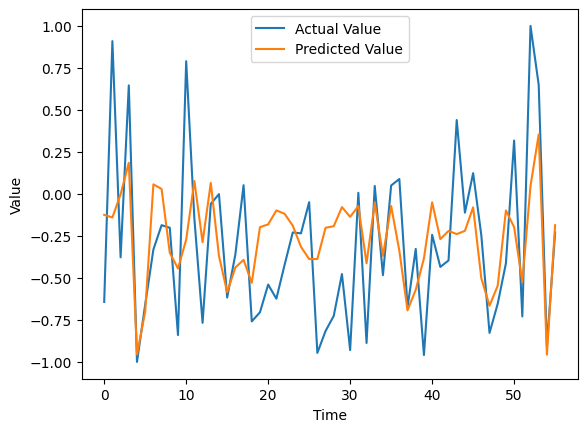

In [92]:
with torch.no_grad():
    predicted = model(X_train.to("cpu")).to('cpu').numpy()

plt.plot(y_train, label='Actual Value')
plt.plot(predicted, label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [93]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])


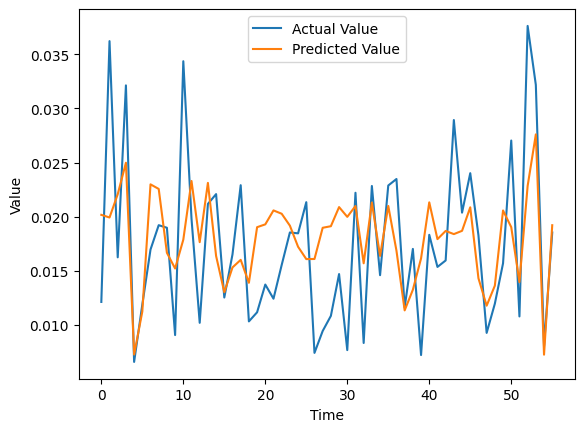

In [94]:
plt.plot(new_y_train, label='Actual Value')
plt.plot(train_predictions, label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [95]:
test_predictions = model(X_test.to("cpu")).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([0.01796103, 0.00851593, 0.01340505, 0.02517849, 0.00562198,
       0.01046061, 0.01973526, 0.01865229, 0.01662879, 0.0178146 ,
       0.01820406, 0.01758436, 0.01937594, 0.01869505, 0.00029656,
       0.00361698, 0.0267853 , 0.00436141, 0.01543845])

In [96]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([0.02483462, 0.0157723 , 0.02423797, 0.02648988, 0.00911267,
       0.02054171, 0.019155  , 0.02181717, 0.01255796, 0.00822607,
       0.01915706, 0.0142397 , 0.02781089, 0.03258352, 0.02382317,
       0.03118493, 0.01661008, 0.02224861, 0.01696625])

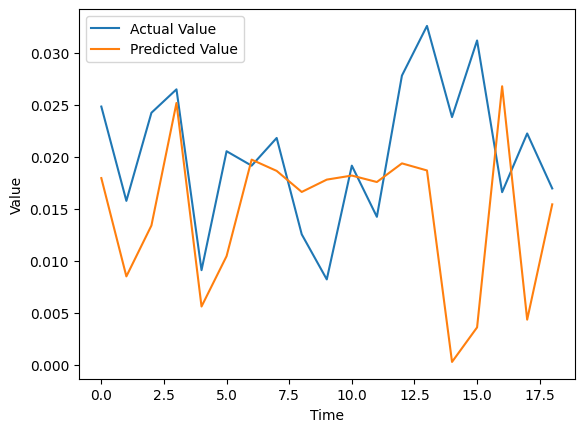

In [97]:
plt.plot(new_y_test, label='Actual Value')
plt.plot(test_predictions, label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
torch.save(model.state_dict(), "metrics-model.pt")